In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/split-dataset-large-optic-cup-vs-possible-glaucoma/split/val/Large optic cup/1ffa94b3-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/split-dataset-large-optic-cup-vs-possible-glaucoma/split/val/Large optic cup/1ffa94c5-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/split-dataset-large-optic-cup-vs-possible-glaucoma/split/val/Large optic cup/1ffa94a3-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/split-dataset-large-optic-cup-vs-possible-glaucoma/split/val/Large optic cup/1ffa94c8-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/split-dataset-large-optic-cup-vs-possible-glaucoma/split/val/Large optic cup/1ffa94b7-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/split-dataset-large-optic-cup-vs-possible-glaucoma/split/val/Possible glaucoma/images (2).jpg
/kaggle/input/split-dataset-large-optic-cup-vs-possible-glaucoma/split/val/Possible glaucoma/1ffa933b-8d87-11e8-9daf-6045cb817f5b..JPG
/kaggle/input/split-dataset-large-optic-cup-vs-possible-glaucoma/split/val/Possible glaucoma

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

trainimages = datagen.flow_from_directory('/kaggle/input/split-dataset-large-optic-cup-vs-possible-glaucoma/split/train',
                                   target_size=(64,64),
                                   class_mode='binary')
valimages = datagen.flow_from_directory('/kaggle/input/split-dataset-large-optic-cup-vs-possible-glaucoma/split/val',
                                   target_size=(64,64),
                                   class_mode='binary')
testimages = datagen.flow_from_directory('/kaggle/input/split-dataset-large-optic-cup-vs-possible-glaucoma/split/test',
                                   target_size=(64,64),
                                   class_mode='binary')    

Found 80 images belonging to 2 classes.
Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [6]:
testimages.class_indices

{'Large optic cup': 0, 'Possible glaucoma': 1}

In [75]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense

model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(64,64,3)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 123008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │     7,872,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,873,537 (30.04 MB)

 Trainable params: 7,873,537 (30.04 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
model.fit(trainimages,
         batch_size=10,
         epochs=15,
         validation_data=valimages)
model.save('opticdisc_cnnmodel.h5')

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 407ms/step - accuracy: 0.5531 - loss: 1.3558 - val_accuracy: 1.0000 - val_loss: 0.1714
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 192ms/step - accuracy: 0.8258 - loss: 0.4600 - val_accuracy: 1.0000 - val_loss: 0.0143
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 204ms/step - accuracy: 0.9555 - loss: 0.1047 - val_accuracy: 1.0000 - val_loss: 0.1193
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.9094 - loss: 0.2249 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step - accuracy: 0.9698 - loss: 0.0874 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - accuracy: 0.9641 - loss: 0.1227 - val_accuracy: 1.0000 - val_loss: 0.0139
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 202ms/step - accuracy: 0.9823 - loss: 0.0683 - val_accuracy: 1.0000 - val_loss: 0.0013
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 183ms/step - accuracy: 0.9885 - loss: 0.0453 - val_accuracy: 1.0000 - val_loss:

In [48]:
y_true=testimages.classes

In [97]:
y_pred=model.predict(testimages)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


In [98]:
y_pred[y_pred<=0.5]=0
y_pred[y_pred>0.5]=1

In [99]:
from sklearn import metrics
metrics.accuracy_score(y_true, y_pred)

0.8

In [100]:
metrics.confusion_matrix(y_true, y_pred)

array([[4, 1],
       [1, 4]])

In [107]:
print(metrics.classification_report(y_true, y_pred,
                                   target_names=['large optic cup','possibly glaucoma']))

                   precision    recall  f1-score   support

  large optic cup       0.80      0.80      0.80         5
possibly glaucoma       0.80      0.80      0.80         5

         accuracy                           0.80        10
        macro avg       0.80      0.80      0.80        10
     weighted avg       0.80      0.80      0.80        10



In [105]:
testimages.class_indices

{'Large optic cup': 0, 'Possible glaucoma': 1}

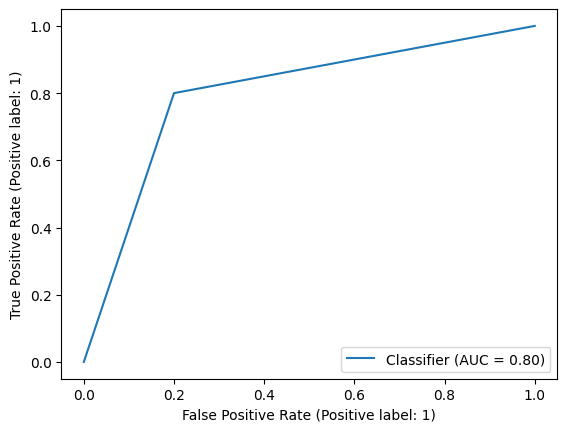

In [102]:
metrics.RocCurveDisplay.from_predictions(y_true, y_pred)

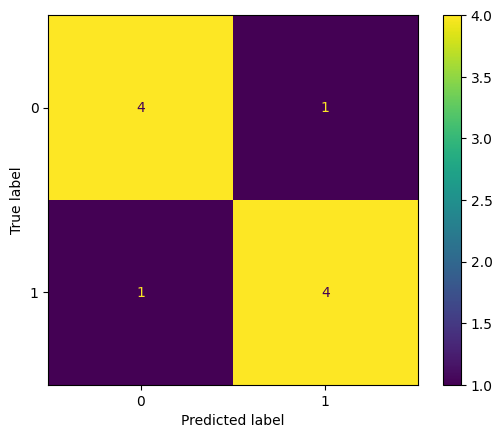

In [103]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

In [110]:
from keras.models import load_model
model=load_model('opticdisc_cnnmodel.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
large optic cup


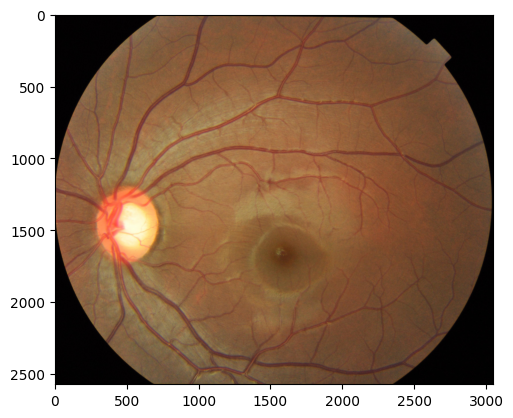

In [ ]:
from keras.preprocessing import image
img_path= '/kaggle/input/split-dataset-large-optic-cup-vs-possible-glaucoma/split/test/Large optic cup/1ffa94b6-8d87-11e8-9daf-6045cb817f5b..JPG'
img = image.load_img(img_path, target_size=(64,64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array/=255

prediction = model.predict(img_array)
if prediction <=0.5:
    print('large optic cup')
else:
    print('possibly glaucomatous')
    
import matplotlib.pyplot as plt
unknown_image1=image.load_img('/kaggle/input/split-dataset-large-optic-cup-vs-possible-glaucoma/split/test/Large optic cup/1ffa94b6-8d87-11e8-9daf-6045cb817f5b..JPG')
plt.imshow(unknown_image1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
possibly glaucomatous


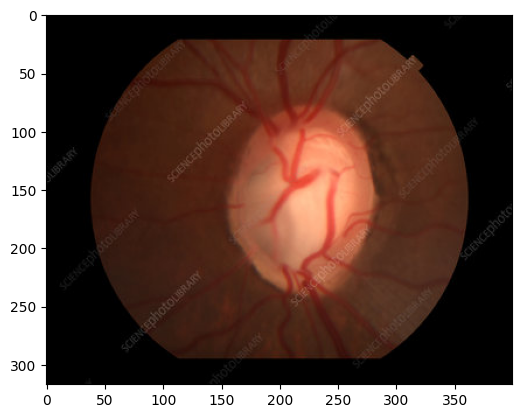

In [ ]:
from keras.preprocessing import image
img_path= '/kaggle/input/split-dataset-large-optic-cup-vs-possible-glaucoma/split/test/Possible glaucoma/400wm (8).jpg'
img = image.load_img(img_path, target_size=(64,64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array/=255

prediction = model.predict(img_array)
if prediction <=0.5:
    print('large optic cup')
else:
    print('possibly glaucomatous')
    
import matplotlib.pyplot as plt
unknown_image2=image.load_img('/kaggle/input/split-dataset-large-optic-cup-vs-possible-glaucoma/split/test/Possible glaucoma/400wm (8).jpg')
plt.imshow(unknown_image2)

dear friends, try predicting internet unknown images